In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/149.4 kB ? eta -:--:--
     ----------------- ------------------- 71.7/149.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 149.4/149.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   -------------------- ------------------- 184.3/356.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 356.2/356.2 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/667.1 kB ? eta -:--:--
   ------------------- ------------------- 337.9/667.1 kB 10.6 MB/s eta 0:00:01
   ---------------------------------------  665.6/667.1 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.9.2 which is incompatible.


In [40]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from ydata_profiling import ProfileReport


In [42]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

# Display the report in Jupyter Notebook
profile.to_notebook_iframe()

# Optionally, save the report
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

In [5]:
data = pd.read_csv("C:/Users/gasho/OneDrive/Desktop/MLAI/Group-8-Credit-Card-Project1/diabetes_dataset.csv")
data.head(20)

year  gender   age location  race:AfricanAmerican  race:Asian  \
0   2020  Female  32.0  Alabama                     0           0   
1   2015  Female  29.0  Alabama                     0           1   
2   2015    Male  18.0  Alabama                     0           0   
3   2015    Male  41.0  Alabama                     0           0   
4   2016  Female  52.0  Alabama                     1           0   
5   2016    Male  66.0  Alabama                     0           0   
6   2015  Female  49.0  Alabama                     0           0   
7   2016  Female  15.0  Alabama                     0           0   
8   2016    Male  51.0  Alabama                     1           0   
9   2015    Male  42.0  Alabama                     0           0   
10  2016    Male  15.0  Alabama                     1           0   
11  2016  Female  53.0  Alabama                     0           0   
12  2015  Female   3.0  Alabama                     1           0   
13  2016  Female  40.0  Alabama                     0           0   
14  2016  Female  64.0  Alabama                     0           0   
15  2015  Female  23.0  Alabama                     0           0   
16  2015  Female   2.0  Alabama                     0           1   
17  2015    Male  80.0  Alabama                     0           0   
18  2016  Female  12.0  Alabama                     0           0   
19  2015  Female  50.0  Alabama                     0           1   

    race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                0              0           1             0              0   
1                0              0           0             0              0   
2                0              0           1             0              0   
3                1              0           0             0              0   
4                0              0           0             0              0   
5                1              0           0             0              0   
6                1              0           0             0              0   
7                0              0           1             0              0   
8                0              0           0             0              0   
9                1              0           0             0              0   
10               0              0           0             0              0   
11               1              0           0             0              0   
12               0              0           0             0              0   
13               0              1           0             0              0   
14               0              0           1             0              0   
15               1              0           0             0              0   
16               0              0           0             0              0   
17               0              0           1             0              0   
18               0              1           0             0              0   
19               0              0           0             0              0   

   smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0            never  27.32          5.0                  100         0  
1            never  19.95          5.0                   90         0  
2            never  23.76          4.8                  160         0  
3            never  27.32          4.0                  159         0  
4            never  23.75          6.5                   90         0  
5      not current  27.32          5.7                  159         0  
6          current  24.34          5.7                   80         0  
7          No Info  20.98          5.0                  155         0  
8            never  38.14          6.0                  100         0  
9          No Info  27.32          5.7                  160         0  
10         No Info  19.15          6.6                  200         0  
11           never  34.30          6.6             

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [7]:
data.describe()

year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.000000        0.00000       0.000000       0.00000   
25%          0.000000        0.00000       0.000000       0.00000   
50%          0.000000        0.00000       0.000000       0.00000   
75%          0.000000        0.00000       0.000000       0.00000   
max          1.000000        1.00000       1.000000       1.00000   

       heart_disease            bmi    hbA1c_level  blood_glucose_level  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean        0.039420      27.320767       5.527507           138.058060   
std         0.194593       6.636783       1.070672            40.708136   
min         0.000000      10.010000       3.500000            80.000000   
25%         0.000000      23.630000       4.800000           100.000000   
50%         0.000000      27.320000       5.800000           140.000000   
75%         0.000000      29.580000       6.200000           159.000000   
max         1.000000      95.690000       9.000000           300.000000   

            diabetes  
count  100000.000000  
mean        0.085000  
std         0.278883  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [8]:
data["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [6]:
label_encoders = {}
for column in ['gender', 'location', 'smoking_history']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head(5)

year  gender   age  location  race:AfricanAmerican  race:Asian  \
0  2020       0  32.0         0                     0           0   
1  2015       0  29.0         0                     0           1   
2  2015       1  18.0         0                     0           0   
3  2015       1  41.0         0                     0           0   
4  2016       0  52.0         0                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

   smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  
0                4  27.32          5.0                  100         0  
1                4  19.95          5.0                   90         0  
2                4  23.76          4.8                  160         0  
3                4  27.32          4.0                  159         0  
4                4  23.75          6.5                   90         0

In [10]:
X=data.drop(columns=['diabetes'])
y=data['diabetes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X_train

year  gender   age  location  race:AfricanAmerican  race:Asian  \
98980  2019       1  59.0        52                     0           0   
69824  2019       0  27.0        34                     0           1   
9928   2019       0  55.0         4                     0           0   
75599  2019       0  30.0        37                     0           0   
95621  2016       0  35.0        50                     0           0   
...     ...     ...   ...       ...                   ...         ...   
6265   2016       1   5.0         3                     0           0   
54886  2019       0  62.0        27                     0           1   
76820  2019       1  26.0        38                     0           1   
860    2019       1   5.0         0                     0           0   
15795  2019       1   2.0         7                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
98980               0              0           1             0              0   
69824               0              0           0             0              0   
9928                1              0           0             0              0   
75599               0              0           1             0              0   
95621               0              0           1             0              0   
...               ...            ...         ...           ...            ...   
6265                1              0           0             0              0   
54886               0              0           0             0              0   
76820               0              0           0             0              0   
860                 0              0           1             0              0   
15795               0              1           0             0              0   

       smoking_history    bmi  hbA1c_level  blood_glucose_level  
98980                0  27.32          5.7                  100  
69824                4  25.80          4.0                  158  
9928                 0  25.94          4.8                  159  
75599                1  33.07          5.7                   85  
95621                4  27.32          6.6                  126  
...                ...    ...          ...                  ...  
6265                 0  12.53          6.1                  160  
54886                0  27.32          4.8                  140  
76820                4  27.32          5.0                   80  
860                  0  19.00          6.2                  200  
15795                0  27.32          5.8                  160  

[75000 rows x 15 columns]

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_under_esampled, y_under_resampled = rus.fit_resample(X_train, y_train)

In [15]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_overresampled, y_overresampled = random_oversampler.fit_resample(X_train, y_train)

In [16]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [17]:
# Fit the training data to the smote_sampler model
X_smote_sampled, y_smote_sampled = smote_sampler.fit_resample(X_train, y_train)

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()

    }

In [19]:
def model_evaluation(X_train, y_train, X_test, y_test,flag):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        y_train_pred = model.predict(X_train)
        
        print(f"{model_name} {flag} Classification Report:")
    
        print('Train Model Score: %.3f' % model.score(X_train, y_train))
        print('Test Model Score: %.3f' %  model.score(X_test, y_test))    

        print(f"Test Accuracy Score :",accuracy_score(y_test, y_pred))
        print('Train Accuracy Score:', accuracy_score(y_train, y_train_pred))
             
        print('Balanced Train Accuracy Score:', balanced_accuracy_score(y_train, y_train_pred))
        print('Balanced Test Accuracy Score:', balanced_accuracy_score(y_test, y_pred))

        pred_probas = model.predict_proba(X_test)
        pred_probas_firsts = [prob[1] for prob in pred_probas]
        print('Test roc_auc_score',roc_auc_score(y_test, pred_probas_firsts))

        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
        cm_display.plot()
        plt.show()
    
           
        print(f"{model_name} {flag} Classification Report:")
        print(classification_report(y_test, y_pred))
         
        print("**********************************************************************")
    
    

Logistic Regression Original Classification Report:
Train Model Score: 0.960
Test Model Score: 0.960
Test Accuracy Score : 0.96012
Train Accuracy Score: 0.9604266666666667
Balanced Train Accuracy Score: 0.8108369865473326
Balanced Test Accuracy Score: 0.8052426159079014
Test roc_auc_score 0.9587851385987564


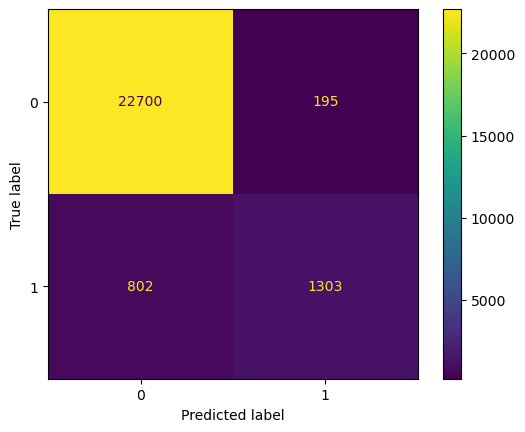

Logistic Regression Original Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22895
           1       0.87      0.62      0.72      2105

    accuracy                           0.96     25000
   macro avg       0.92      0.81      0.85     25000
weighted avg       0.96      0.96      0.96     25000

**********************************************************************
Decision Tree Original Classification Report:
Train Model Score: 1.000
Test Model Score: 0.949
Test Accuracy Score : 0.9494
Train Accuracy Score: 0.9999866666666667
Balanced Train Accuracy Score: 0.9999218139171228
Balanced Test Accuracy Score: 0.8509399255819841
Test roc_auc_score 0.8509399255819841


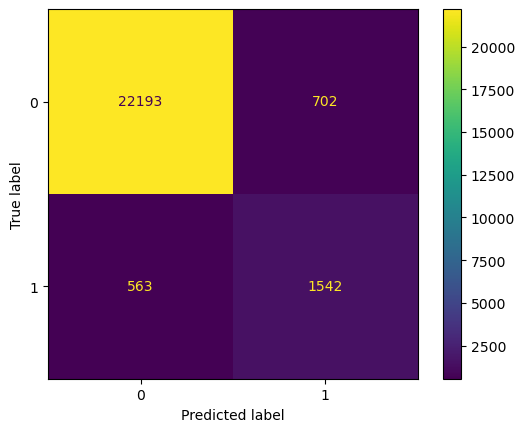

Decision Tree Original Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.69      0.73      0.71      2105

    accuracy                           0.95     25000
   macro avg       0.83      0.85      0.84     25000
weighted avg       0.95      0.95      0.95     25000

**********************************************************************
Random Forest Original Classification Report:
Train Model Score: 1.000
Test Model Score: 0.971
Test Accuracy Score : 0.9712
Train Accuracy Score: 0.9999733333333334
Balanced Train Accuracy Score: 0.9998436278342455
Balanced Test Accuracy Score: 0.8330767487014715
Test roc_auc_score 0.9646852744559876


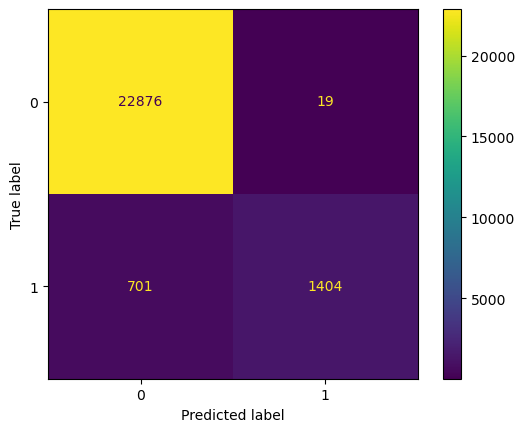

Random Forest Original Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.99      0.67      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.98      0.83      0.89     25000
weighted avg       0.97      0.97      0.97     25000

**********************************************************************
Gradient Boosting Original Classification Report:
Train Model Score: 0.972
Test Model Score: 0.972
Test Accuracy Score : 0.97176
Train Accuracy Score: 0.9723866666666666
Balanced Train Accuracy Score: 0.842755889327802
Balanced Test Accuracy Score: 0.8368335461019765
Test roc_auc_score 0.977799538220286


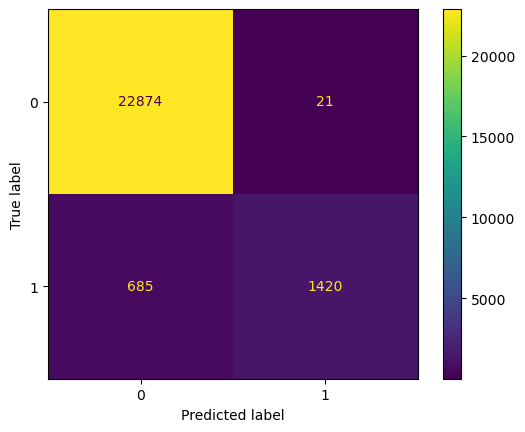

Gradient Boosting Original Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.99      0.67      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.98      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

**********************************************************************
KNeighborsClassifier Original Classification Report:
Train Model Score: 0.964
Test Model Score: 0.954
Test Accuracy Score : 0.95424
Train Accuracy Score: 0.9637866666666667
Balanced Train Accuracy Score: 0.8080652183959356
Balanced Test Accuracy Score: 0.7599725899347376
Test roc_auc_score 0.8873103951271917


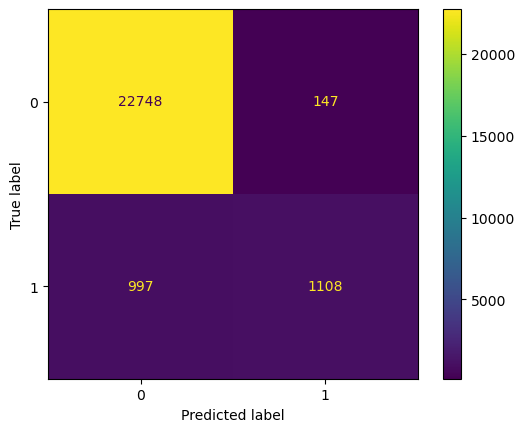

KNeighborsClassifier Original Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.88      0.53      0.66      2105

    accuracy                           0.95     25000
   macro avg       0.92      0.76      0.82     25000
weighted avg       0.95      0.95      0.95     25000

**********************************************************************
Logistic Regression Under Sample Classification Report:
Train Model Score: 0.884
Test Model Score: 0.888
Test Accuracy Score : 0.88804
Train Accuracy Score: 0.8836591086786552
Balanced Train Accuracy Score: 0.8836591086786552
Balanced Test Accuracy Score: 0.8780482933810709
Test roc_auc_score 0.9594340993869046


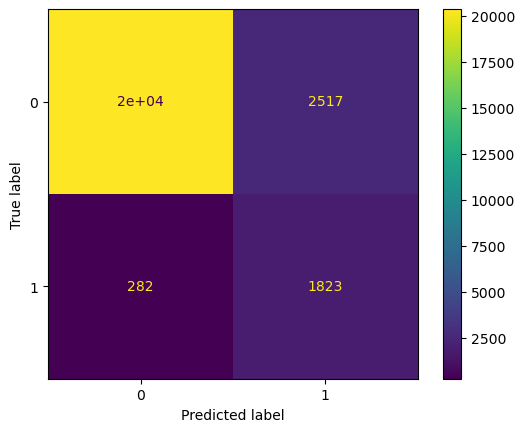

Logistic Regression Under Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     22895
           1       0.42      0.87      0.57      2105

    accuracy                           0.89     25000
   macro avg       0.70      0.88      0.75     25000
weighted avg       0.94      0.89      0.90     25000

**********************************************************************
Decision Tree Under Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.882
Test Accuracy Score : 0.88184
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.874016202232748
Test roc_auc_score 0.874016202232748


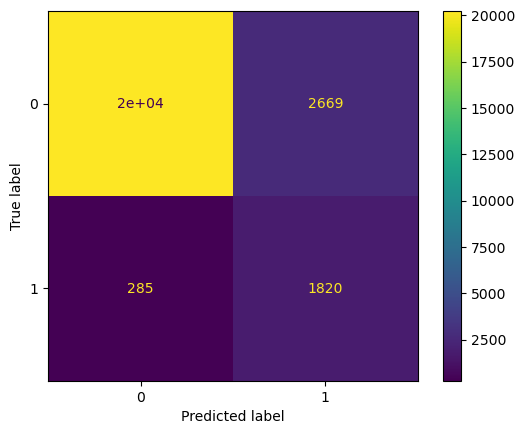

Decision Tree Under Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     22895
           1       0.41      0.86      0.55      2105

    accuracy                           0.88     25000
   macro avg       0.70      0.87      0.74     25000
weighted avg       0.94      0.88      0.90     25000

**********************************************************************
Random Forest Under Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.902
Test Accuracy Score : 0.9016
Train Accuracy Score: 1.0
Balanced Train Accuracy Score: 1.0
Balanced Test Accuracy Score: 0.8999029442995727
Test roc_auc_score 0.971829331363516


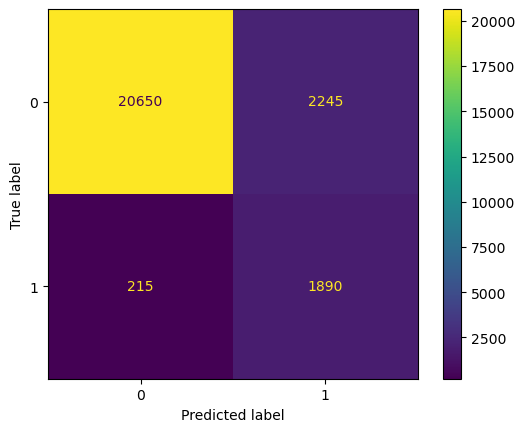

Random Forest Under Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     22895
           1       0.46      0.90      0.61      2105

    accuracy                           0.90     25000
   macro avg       0.72      0.90      0.77     25000
weighted avg       0.94      0.90      0.92     25000

**********************************************************************
Gradient Boosting Under Sample Classification Report:
Train Model Score: 0.919
Test Model Score: 0.904
Test Accuracy Score : 0.90408
Train Accuracy Score: 0.919233776387803
Balanced Train Accuracy Score: 0.9192337763878029
Balanced Test Accuracy Score: 0.9090218227485904
Test roc_auc_score 0.9778425000220464


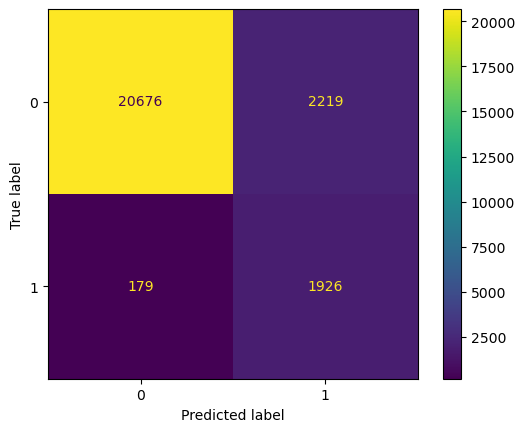

Gradient Boosting Under Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     22895
           1       0.46      0.91      0.62      2105

    accuracy                           0.90     25000
   macro avg       0.73      0.91      0.78     25000
weighted avg       0.95      0.90      0.92     25000

**********************************************************************
KNeighborsClassifier Under Sample Classification Report:
Train Model Score: 0.907
Test Model Score: 0.850
Test Accuracy Score : 0.85016
Train Accuracy Score: 0.9065676309616888
Balanced Train Accuracy Score: 0.9065676309616888
Balanced Test Accuracy Score: 0.8612493574144902
Test roc_auc_score 0.9335862210992141


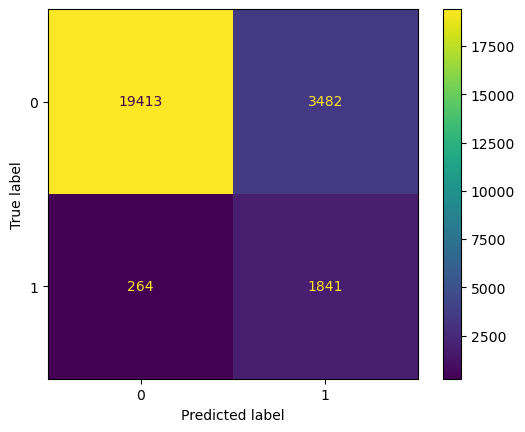

KNeighborsClassifier Under Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     22895
           1       0.35      0.87      0.50      2105

    accuracy                           0.85     25000
   macro avg       0.67      0.86      0.70     25000
weighted avg       0.93      0.85      0.88     25000

**********************************************************************
Logistic Regression Over Sample Classification Report:
Train Model Score: 0.886
Test Model Score: 0.888
Test Accuracy Score : 0.88824
Train Accuracy Score: 0.885613293491728
Balanced Train Accuracy Score: 0.885613293491728
Balanced Test Accuracy Score: 0.8762162697723108
Test roc_auc_score 0.9593737598942607


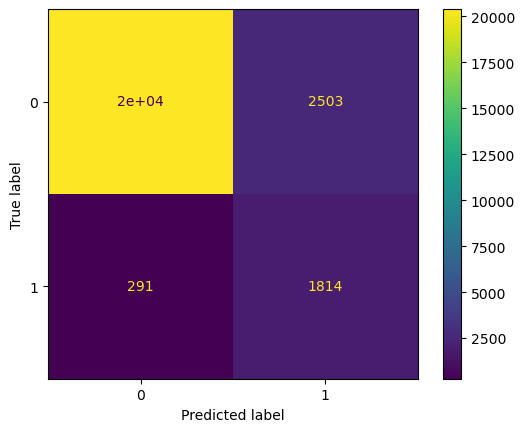

Logistic Regression Over Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     22895
           1       0.42      0.86      0.56      2105

    accuracy                           0.89     25000
   macro avg       0.70      0.88      0.75     25000
weighted avg       0.94      0.89      0.90     25000

**********************************************************************
Decision Tree Over Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.955
Test Accuracy Score : 0.955
Train Accuracy Score: 0.9999927119014649
Balanced Train Accuracy Score: 0.9999927119014649
Balanced Test Accuracy Score: 0.8483893992973188
Test roc_auc_score 0.8483893992973188


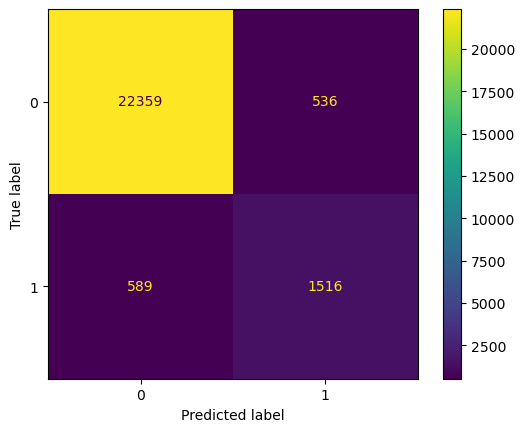

Decision Tree Over Sample Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22895
           1       0.74      0.72      0.73      2105

    accuracy                           0.95     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000

**********************************************************************
Random Forest Over Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.970
Test Accuracy Score : 0.96988
Train Accuracy Score: 0.9999927119014649
Balanced Train Accuracy Score: 0.9999927119014649
Balanced Test Accuracy Score: 0.8457289007598979
Test roc_auc_score 0.9665510470966547


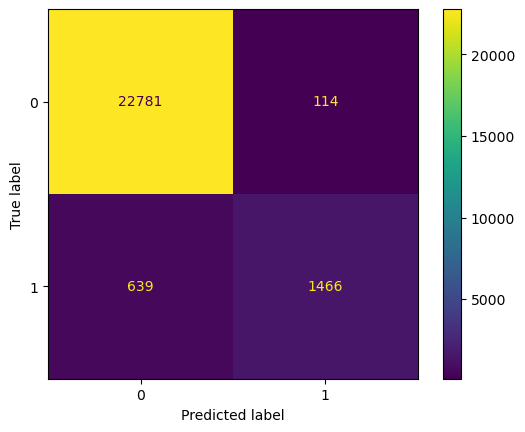

Random Forest Over Sample Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.93      0.70      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.95      0.85      0.89     25000
weighted avg       0.97      0.97      0.97     25000

**********************************************************************
Gradient Boosting Over Sample Classification Report:
Train Model Score: 0.919
Test Model Score: 0.907
Test Accuracy Score : 0.90696
Train Accuracy Score: 0.9194373587930909
Balanced Train Accuracy Score: 0.9194373587930909
Balanced Test Accuracy Score: 0.9084373098504532
Test roc_auc_score 0.9780413838036808


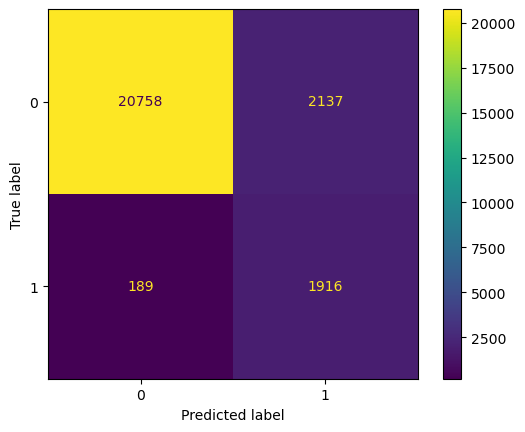

Gradient Boosting Over Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     22895
           1       0.47      0.91      0.62      2105

    accuracy                           0.91     25000
   macro avg       0.73      0.91      0.78     25000
weighted avg       0.95      0.91      0.92     25000

**********************************************************************
KNeighborsClassifier Over Sample Classification Report:
Train Model Score: 0.972
Test Model Score: 0.907
Test Accuracy Score : 0.90748
Train Accuracy Score: 0.9724509875373515
Balanced Train Accuracy Score: 0.9724509875373515
Balanced Test Accuracy Score: 0.8336607947362715
Test roc_auc_score 0.8797223096870511


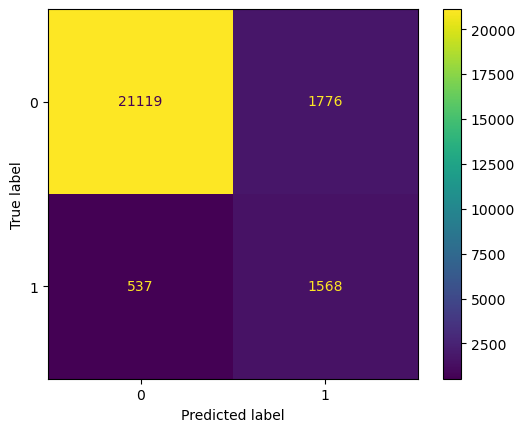

KNeighborsClassifier Over Sample Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22895
           1       0.47      0.74      0.58      2105

    accuracy                           0.91     25000
   macro avg       0.72      0.83      0.76     25000
weighted avg       0.93      0.91      0.92     25000

**********************************************************************
Logistic Regression Smote Sample Classification Report:
Train Model Score: 0.891
Test Model Score: 0.889
Test Accuracy Score : 0.88864
Train Accuracy Score: 0.8913636032359158
Balanced Train Accuracy Score: 0.8913636032359158
Balanced Test Accuracy Score: 0.8770817306520162
Test roc_auc_score 0.9593002237312861


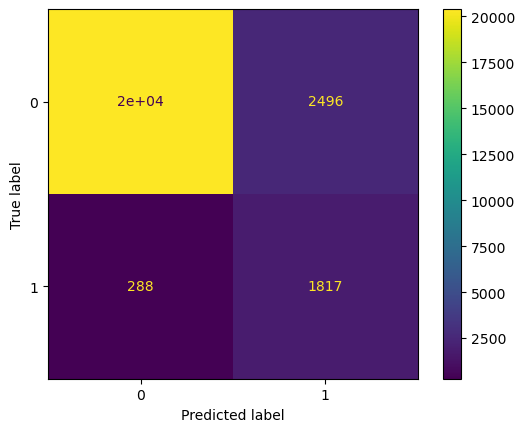

Logistic Regression Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     22895
           1       0.42      0.86      0.57      2105

    accuracy                           0.89     25000
   macro avg       0.70      0.88      0.75     25000
weighted avg       0.94      0.89      0.90     25000

**********************************************************************
Decision Tree Smote Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.943
Test Accuracy Score : 0.94328
Train Accuracy Score: 0.9999927119014649
Balanced Train Accuracy Score: 0.9999927119014649
Balanced Test Accuracy Score: 0.8469515120925386
Test roc_auc_score 0.846945639989231


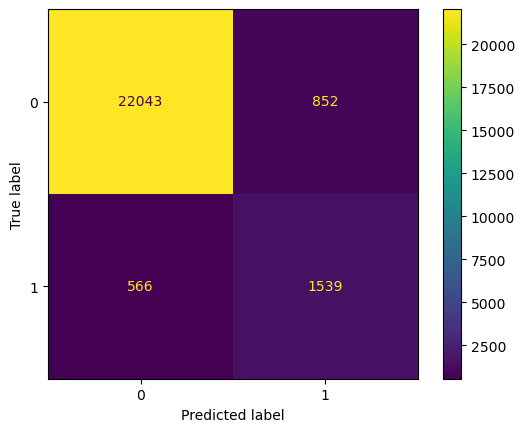

Decision Tree Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     22895
           1       0.64      0.73      0.68      2105

    accuracy                           0.94     25000
   macro avg       0.81      0.85      0.83     25000
weighted avg       0.95      0.94      0.94     25000

**********************************************************************
Random Forest Smote Sample Classification Report:
Train Model Score: 1.000
Test Model Score: 0.963
Test Accuracy Score : 0.96272
Train Accuracy Score: 0.9999854238029298
Balanced Train Accuracy Score: 0.9999854238029298
Balanced Test Accuracy Score: 0.8554082745820406
Test roc_auc_score 0.966367082192328


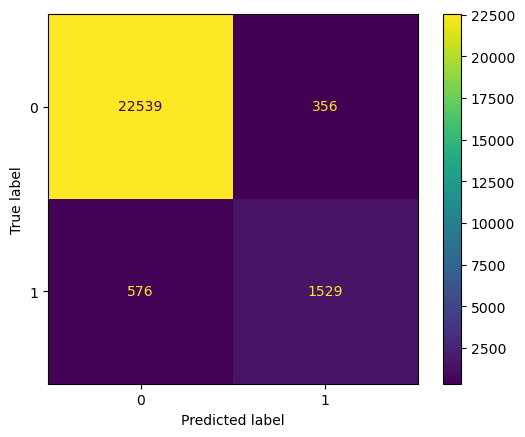

Random Forest Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22895
           1       0.81      0.73      0.77      2105

    accuracy                           0.96     25000
   macro avg       0.89      0.86      0.87     25000
weighted avg       0.96      0.96      0.96     25000

**********************************************************************
Gradient Boosting Smote Sample Classification Report:
Train Model Score: 0.967
Test Model Score: 0.958
Test Accuracy Score : 0.9582
Train Accuracy Score: 0.9674221995481379
Balanced Train Accuracy Score: 0.9674221995481379
Balanced Test Accuracy Score: 0.8615681213263691
Test roc_auc_score 0.9718055628322835


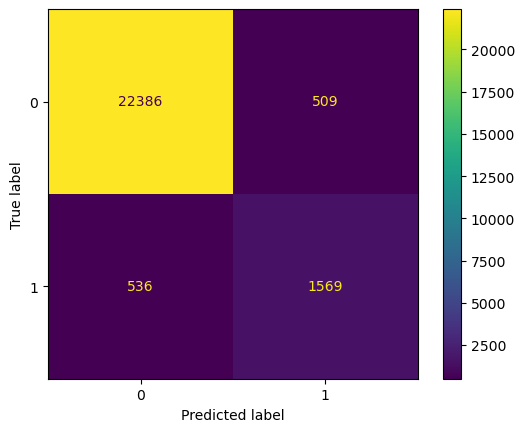

Gradient Boosting Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22895
           1       0.76      0.75      0.75      2105

    accuracy                           0.96     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.96      0.96      0.96     25000

**********************************************************************
KNeighborsClassifier Smote Sample Classification Report:
Train Model Score: 0.964
Test Model Score: 0.894
Test Accuracy Score : 0.89436
Train Accuracy Score: 0.9643101814736535
Balanced Train Accuracy Score: 0.9643101814736535
Balanced Test Accuracy Score: 0.8469882905487667
Test roc_auc_score 0.9040273810159881


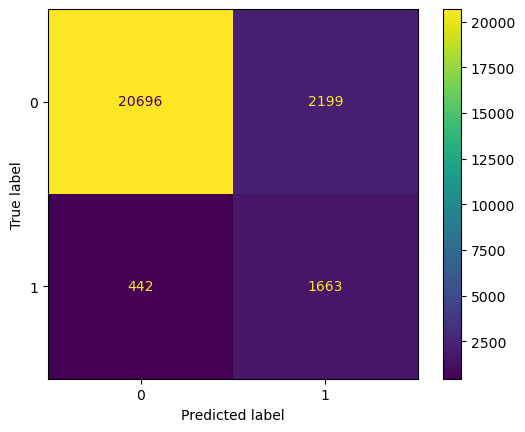

KNeighborsClassifier Smote Sample Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     22895
           1       0.43      0.79      0.56      2105

    accuracy                           0.89     25000
   macro avg       0.70      0.85      0.75     25000
weighted avg       0.93      0.89      0.91     25000

**********************************************************************


In [20]:
model_evaluation(X_train, y_train, X_test, y_test,"Original")
model_evaluation(X_under_esampled, y_under_resampled, X_test, y_test,"Under Sample")
model_evaluation(X_overresampled, y_overresampled, X_test, y_test,"Over Sample")
model_evaluation(X_smote_sampled, y_smote_sampled, X_test, y_test,"Smote Sample")


k: 1, Train/Test Score: 1.000/0.941
k: 3, Train/Test Score: 0.969/0.952
k: 5, Train/Test Score: 0.964/0.954
k: 7, Train/Test Score: 0.962/0.955
k: 9, Train/Test Score: 0.960/0.955
k: 11, Train/Test Score: 0.959/0.955
k: 13, Train/Test Score: 0.958/0.954
k: 15, Train/Test Score: 0.957/0.954
k: 17, Train/Test Score: 0.957/0.954
k: 19, Train/Test Score: 0.956/0.953


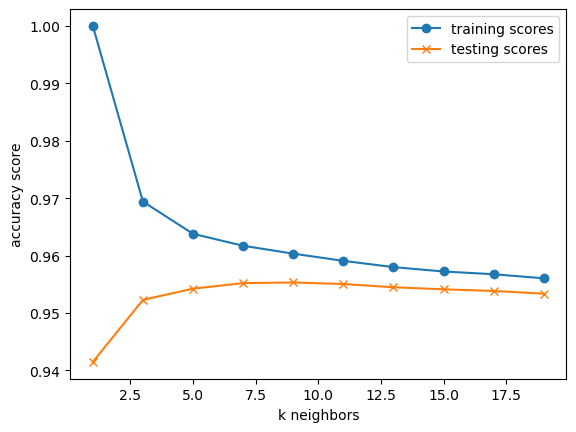

In [21]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [22]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 40 in steps of 2
depths = range(1, 40, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth (this will take time to run)
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df

train     test
depth                   
1      0.914733  0.91580
3      0.956000  0.95636
5      0.972053  0.97132
7      0.972053  0.97132
9      0.972053  0.97132
11     0.972373  0.97132
13     0.973813  0.97132
15     0.976400  0.97136
17     0.980800  0.97148
19     0.986920  0.97156
21     0.993173  0.97144
23     0.997800  0.97148
25     0.999627  0.97172
27     0.999907  0.97140
29     0.999960  0.97184
31     0.999987  0.97148
33     0.999973  0.97144
35     0.999987  0.97160
37     0.999973  0.97136
39     0.999973  0.97148

In [23]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [24]:
rf_model = rf_model.fit(X_train, y_train)

In [25]:
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:15]

[(0.38698584419143583, 'hbA1c_level'),
 (0.29825129443391035, 'blood_glucose_level'),
 (0.08465511145568101, 'bmi'),
 (0.07950775405891448, 'age'),
 (0.05960453222695472, 'location'),
 (0.024106090268287896, 'smoking_history'),
 (0.01381585174688654, 'hypertension'),
 (0.01114748623307333, 'year'),
 (0.011053873145219559, 'heart_disease'),
 (0.006460317704937835, 'gender'),
 (0.005093295384078275, 'race:Caucasian'),
 (0.004986017214634985, 'race:Asian'),
 (0.004983919396334226, 'race:Hispanic'),
 (0.004969167508047983, 'race:AfricanAmerican'),
 (0.004379445031602976, 'race:Other')]

In [7]:
scaler = StandardScaler()
df = scaler.fit_transform(data)


In [8]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

k       inertia
0   1  1.600000e+06
1   2  1.448749e+06
2   3  1.358482e+06
3   4  1.224878e+06
4   5  1.099941e+06
5   6  1.084408e+06
6   7  9.723197e+05
7   8  9.185405e+05
8   9  8.956688e+05
9  10  8.775313e+05

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

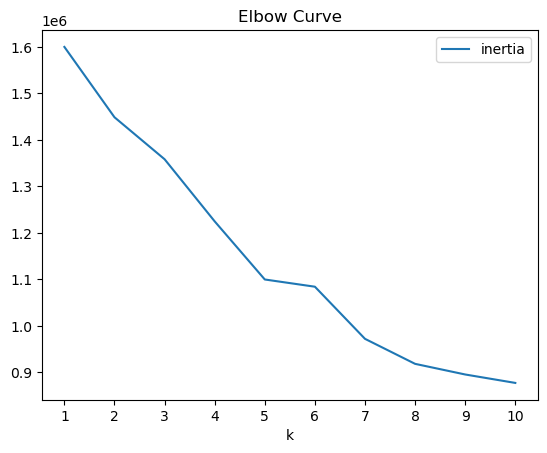

In [9]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [18]:
# Define the model with 3 clusters
model = KMeans(n_clusters=6, n_init='auto', random_state=3)

# Fit the model
model.fit(df)

# Make predictions
kmeans_predictions = model.predict(df)

In [25]:
# Create a copy of the preprocessed data
predictions_df = data.copy()
# Add class columns with the labels to the new DataFrame
predictions_df["kmeans_segments"] = kmeans_predictions
predictions_df.head()

year  gender   age  location  race:AfricanAmerican  race:Asian  \
0  2020       0  32.0         0                     0           0   
1  2015       0  29.0         0                     0           1   
2  2015       1  18.0         0                     0           0   
3  2015       1  41.0         0                     0           0   
4  2016       0  52.0         0                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

   smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes  \
0                4  27.32          5.0                  100         0   
1                4  19.95          5.0                   90         0   
2                4  23.76          4.8                  160         0   
3                4  27.32          4.0                  159         0   
4                4  23.75          6.5                   90         0   

   kmeans_segments  
0                1  
1                0  
2                1  
3                2  
4                5

<Axes: xlabel='hbA1c_level', ylabel='diabetes'>

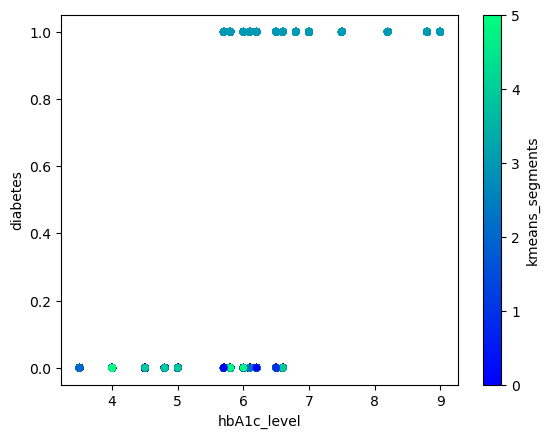

In [44]:
# Plot the kmeans clusters using the limit_bal and age columns. 
predictions_df.plot.scatter(
    x="hbA1c_level",
    y="diabetes",
    c="kmeans_segments",
    colormap="winter")

In [33]:
# Create a list to store values and the values of k
score_kmeans = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

In [35]:
from sklearn import metrics
# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto',random_state=0)
    k_model.fit(df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(df, labels)    
    score_kmeans.append(score)
        

In [36]:
score_kmeans

[10439.938041437708,
 8888.987365896377,
 10208.020947850137,
 11365.026030001853,
 9508.61503545602,
 10758.40321092782,
 10597.668569572426,
 9828.829870577436,
 9146.829909544505]